# Problem Description

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


# Importing Libraries

In [ ]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing data 

In [ ]:
train = pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('../input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
print (train.shape, test.shape)

(614, 13) (367, 12)


# EDA & Data-Preprocessing

### Viewing the train dataset

In [ ]:
train.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Viewing no of null data in each feature of the train dataset

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Viewing the test dataset

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Viewing no of null data in each feature of the test dataset

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Counting frequency of categories for each categorical features

In [ ]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


#### Plotting No. of Males vs No. of Females

<AxesSubplot:xlabel='Gender', ylabel='count'>

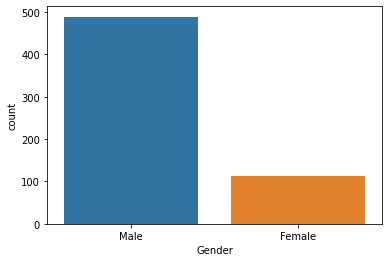

In [ ]:
sns.countplot(train['Gender'])

#### Approval of loans between Males & Females

In [ ]:
pd.crosstab(train.Gender, train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


> The male are in large number as compared to female applicants.

### Filling up NAN values of Gender and Converting categorial variables(Male,Female) to numerical variables(0,1)

In [ ]:
train.Gender = train.Gender.fillna(train.Gender.mode())
test.Gender = test.Gender.fillna(test.Gender.mode())

sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex = pd.get_dummies(test['Gender'] , drop_first = True )
test.drop(['Gender'], axis = 1 , inplace =True)
test = pd.concat([test , sex ] , axis = 1)

### Plotting No. of Dependants (Size of family) in each household

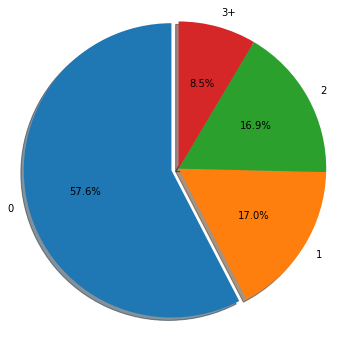

In [ ]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [ ]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### Approval of loans between different sizes of families

In [ ]:
pd.crosstab(train.Dependents , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


> The applicants with highest number of dependants are least in number whereas applicants with no dependance are greatest among these.

### Filling up NAN values of Dependents and Converting categorial variables(1,2,3+) to numerical variables(1,2,3)

In [ ]:
train.Dependents = train.Dependents.fillna("0")
test.Dependents = test.Dependents.fillna("0")

rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)

### Plotting No. of people with vs without Credit History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

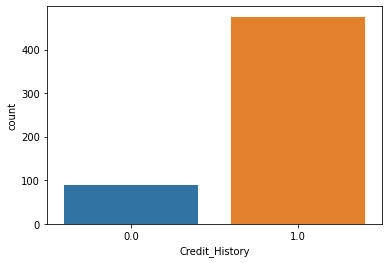

In [ ]:
sns.countplot(train['Credit_History'])

### Approval of loans people those who have Credit History and those who don't

In [ ]:
pd.crosstab(train.Credit_History , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


### Filling up NAN values of Credit history by taking the mode

In [ ]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History  = test.Credit_History.fillna(test.Credit_History.mode()[0])

### Plotting No. of people who are Self-employed vs who aren't

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

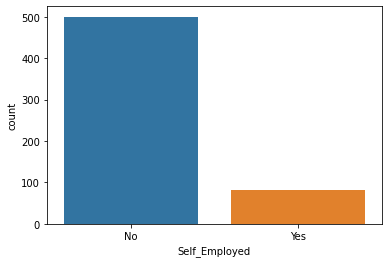

In [ ]:
sns.countplot(train['Self_Employed'])

### Approval of loans between people who are Self-employed & who aren't

In [ ]:
pd.crosstab(train.Self_Employed , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


### Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [ ]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode())

self_Employed = pd.get_dummies(train['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(test['Self_Employed'] , prefix = 'employed' ,drop_first = True )
test.drop(['Self_Employed'], axis = 1 , inplace =True)
test = pd.concat([test , self_Employed ] , axis = 1)

### Plotting No. of Married people vs Unmarried people

<AxesSubplot:xlabel='Married', ylabel='count'>

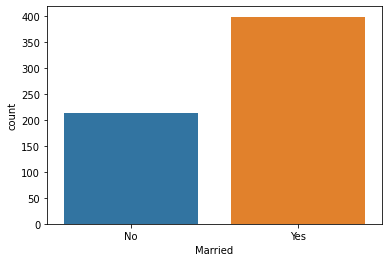

In [ ]:
sns.countplot(train.Married)

### Approval of loans between Married and Unmarried people

In [ ]:
pd.crosstab(train.Married , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


### Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [ ]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

married = pd.get_dummies(train['Married'] , prefix = 'married',drop_first = True )
train.drop(['Married'], axis = 1 , inplace =True)
train = pd.concat([train , married ] , axis = 1)

married = pd.get_dummies(test['Married'] , prefix = 'married', drop_first = True )
test.drop(['Married'], axis = 1 , inplace =True)
test = pd.concat([test , married ] , axis = 1)

### Filling up NAN values of Loan Amount Term

In [ ]:
train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean()).astype(int)
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean()).astype(int)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

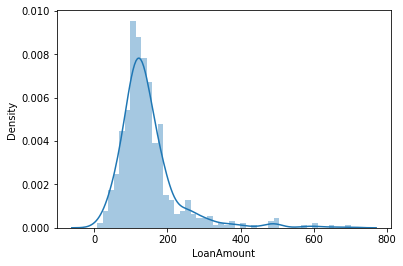

In [ ]:
sns.distplot(train['LoanAmount'])

> We observe no outliers in the continuous variable Loan Amount

### Plotting Graduates vs Non-Graduates

<AxesSubplot:xlabel='Education', ylabel='count'>

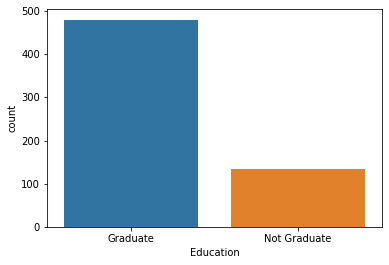

In [ ]:
sns.countplot(train.Education)

### Converting categorial variables to numerical variables

In [ ]:
train['Education'] = train['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
test['Education'] = test['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

### Property Area

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

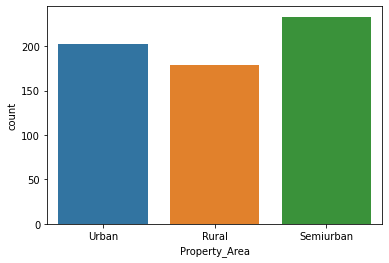

In [ ]:
sns.countplot(train.Property_Area)

### Converting categorial variables to numerical variables

In [ ]:
train['Property_Area'] = train['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

test.Property_Area = test.Property_Area.fillna(test.Property_Area.mode())
test['Property_Area'] = test['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)


### Plotting Co-Applicant income and Applicant income

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

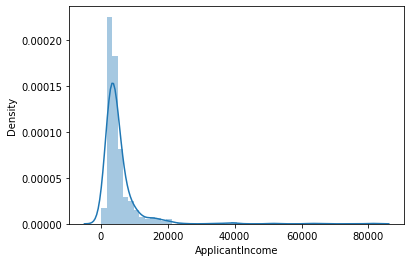

In [ ]:
sns.distplot(train['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

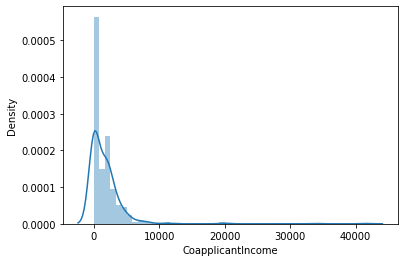

In [ ]:
sns.distplot(train['CoapplicantIncome'])

### Target Variable : Loan Status (Converting categorial variables to numerical variables)

In [ ]:
train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

### Dropping the ID column

In [ ]:
train.drop(['Loan_ID'], axis = 1 , inplace =True)

### Viewing the Datasets

In [ ]:
train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,employed_Yes,married_Yes
0,0,0,5849,0.0,146,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128,1.0,2,0,1,0,1
2,0,0,3000,0.0,66,1.0,0,1,1,1,1
3,0,1,2583,2358.0,120,1.0,0,1,1,0,1
4,0,0,6000,0.0,141,1.0,0,1,1,0,0


In [ ]:
test.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,LP001015,0,0,5720,0,110,1.0,0,1,0,1
1,LP001022,1,0,3076,1500,126,1.0,0,1,0,1
2,LP001031,2,0,5000,1800,208,1.0,0,1,0,1
3,LP001035,2,0,2340,2546,100,1.0,0,1,0,1
4,LP001051,0,1,3276,0,78,1.0,0,1,0,0


# Visualizing the Correlations and Relations

### Plot between LoanAmount, Applicant Income, Employement and Gender

*What is the relation of Loan taken between men and women?<br> Did the employed ones were greater in number to take Loan ?<br> What is distribution of Loan Amount and Income?*

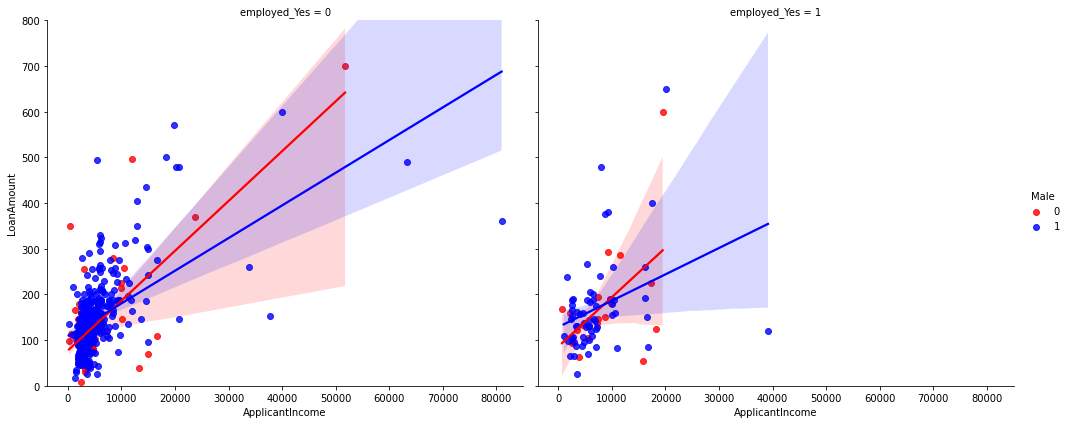

In [ ]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= train , col='employed_Yes', hue='Male',
          palette= ["Red" , "Blue","Yellow"] ,aspect=1.2,size=6)
g.set(ylim=(0, 800))
##Relation Between the Male or female Applicant's income , Loan taken and Self employment.

### Above graph tells:
    - The male applicants take more amount of loan than female.
    - The males are higher in number of "NOT self employed" category.
    - The amount is still larger in the income range in (0 to 20000).
    - Also we observe that majority of applicants are NOT self employed.
    - Highest Loan amount taken is by the female applicant of about 700 which is NOT self employed.
    - The majority of income taken is about 0-200 with income in the range 0-20000. 
    - The line plotted shows that with increase in income the amount of loan increases with almost same slope for the case of women in both the cases but a slightely lesser slope in the case of men in Self- Employed category as compared to non-self employed.


### Boxplots for  relation between Property Area, Amount of Loan and Education qualification 

- Property_Area: 
    - `Urban      :0`
    - `Semiurban  :1`
    - `Rural      :2`

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

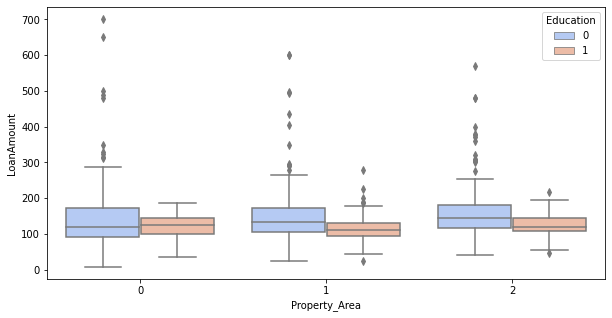

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=train, palette="coolwarm")

### The above boxplot signifies that,
    - In the Urban area the non graduates take slightly more loan than graduates. 
    - In the Rural and semiurban area the graduates take more amount of Loan than non graduates 
    - The higher values of Loan are mostly from Urban area 
    - The semiurban area and rural area both have one unusual Loan amount close to zero.


### Relation between Credit History and Loan status.

In [ ]:
train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History'>

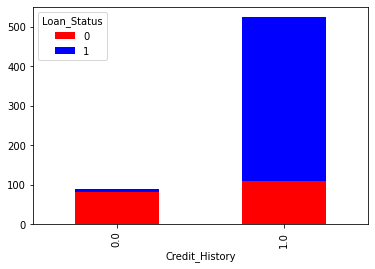

In [ ]:
lc = pd.crosstab(train['Credit_History'], train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

- The credit history vs Loan Status indicates:
    - The good credit history applicants have more chances of getting Loan.
    - With better credit History the Loan amount given was greater too.
    - But many were not given loan in the range 0-100
    - The applicant with poor credit history were handled in the range 0-100 only.

<AxesSubplot:>

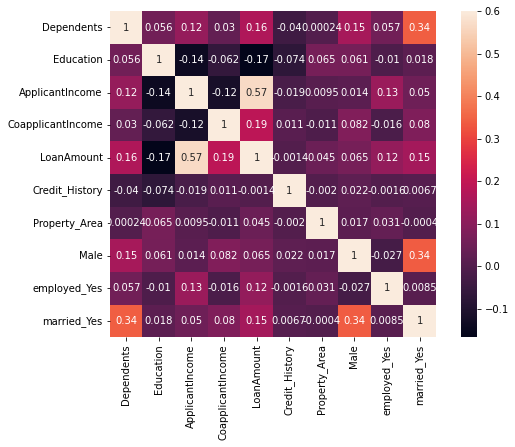

In [ ]:
plt.figure(figsize=(9,6))
sns.heatmap(train.drop('Loan_Status',axis=1).corr(), vmax=0.6, square=True, annot=True)

# Modelling

The problem is of **Classification** as observed and concluded from the data and visualisations.

In [ ]:
X = train.drop('Loan_Status' , axis = 1 )
y = train['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

83.78378378378379

### Random Forest

In [ ]:

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

80.54054054054053

### K-Nearest Neighbors

In [ ]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

61.08108108108108

### Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

82.16216216216216

### SVM

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

70.27027027027027

### Gradient Boosting Classifier

In [ ]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

82.16216216216216

In [ ]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,83.783784
3,Naive Bayes,82.162162
5,Gradient Boosting Classifier,82.162162
1,Random Forrest,80.540541
4,SVM,70.270270
2,K- Nearest Neighbour,61.081081


## The highest classification accuracy is shown by Logistic Regression => 83.78%

### Let us Check the feature importance

In [ ]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Credit_History,0.235
ApplicantIncome,0.224
LoanAmount,0.213
CoapplicantIncome,0.129
Dependents,0.054
Property_Area,0.051
Education,0.026
Male,0.025
married_Yes,0.025


<AxesSubplot:xlabel='Features'>

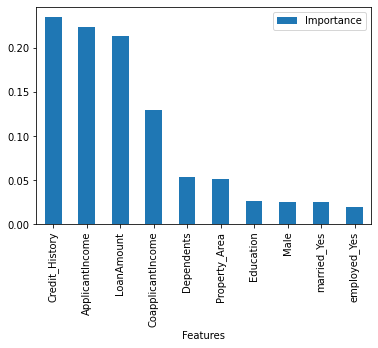

In [ ]:
importances.plot.bar()

> Credit History has the maximum importance and Employment has the least!

# Conclusion

The Loan status has better relation with features such as Credit History, Applicant's Income, Loan Amount needed by them, Family status(Depenedents) and Property Area which are generally considered by the loan providing organisations. These factors are hence used to take correct decisions to provide loan status or not. This data analysis hence gives a realisation of features and the relation between them from the older decision examples hence giving a learning to predict the class of the unseen data. 

# Submission
## Finally we predict over unseen dataset using the Logistic Regression and Random Forest model (**Ensemble Learning**)

In [ ]:
df_test = test.drop(['Loan_ID'], axis = 1)

In [ ]:
df_test.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,0,0,5720,0,110,1.0,0,1,0,1
1,1,0,3076,1500,126,1.0,0,1,0,1
2,2,0,5000,1800,208,1.0,0,1,0,1
3,2,0,2340,2546,100,1.0,0,1,0,1
4,0,1,3276,0,78,1.0,0,1,0,0


In [ ]:
p_log = logmodel.predict(df_test)

In [ ]:
p_rf = random_forest.predict(df_test)

In [ ]:
predict_combine = np.zeros((df_test.shape[0]))

for i in range(0, test.shape[0]):
    temp = p_log[i] + p_rf[i]
    if temp>=2:
        predict_combine[i] = 1
predict_combine = predict_combine.astype('int')

In [ ]:
submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status": predict_combine
    })

submission.to_csv("results.csv", encoding='utf-8', index=False)
